In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#### Generating & Visualizing Data


(50, 1)
(50,)


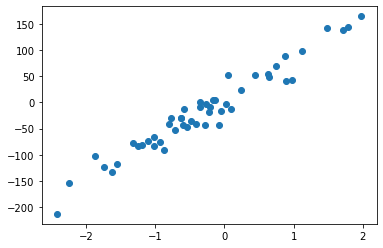

In [6]:
X, y, coef = make_regression(n_features=1, noise=20, n_samples=50, coef=True, random_state=3)

print(X.shape)
print(y.shape)

plt.scatter(X[:,0], y)

#### Pre Processing Function

In [7]:
def pre_process(X):
    """ Appends one to data matrix to account for bias"""
    ones = np.ones(X.shape[0]).reshape(-1,1)
    return np.hstack((ones, X))

#### Model Training Function

In [8]:
def linear_regression(X, y, alpha=0.01, n_iterations=100):
    """ 
        Function that performs training on data and returns weights
        Arguements:
            X: Data matrix of size n*m, n=number of samples & m=number of features
            y: Predictions Vector, of size n*1
            alpha: Learning rate for optimizing with gradient
            n_iterations: Maximum number of iterations while training
        Returns:
            weights: Final model weights after training
            loss_history: Loss in each iteration of training
            weights_history: Weights in each iteration of training
    """
    X = pre_process(X)
    n_features = X.shape[1]
    n_samples = X.shape[0]
    loss_history = []
    weights_history = []
    
    weights = np.zeros(n_features)

    for n in range(n_iterations):
        yhat= X @ weights
        error = yhat - y
        
        cost = (error ** 2).mean()
        loss_history.append(cost)
        
        grad_vector = (X.T @ error) * (2/n_samples)
#         grad_vector = np.array(
#             [(2/n_samples) * np.sum((error) * X[:,i]) for i in range(n_features)]
#         )

        weights = weights -  (alpha * grad_vector)
        weights_history.append(weights)
        

    return np.array(weights), np.array(loss_history), np.array(weights_history)

#### Prediction Function

In [9]:
def perform_predictions(samples, weights):
    samples = pre_process(samples)
    predictions = samples @ weights
    return predictions

#### Compute Error Metrics Function

In [10]:
def compute_error_metrics(y_hat, y):
    r2 = r2_score(y_hat, y)
    mse = mean_squared_error(y_hat, y)
    return r2, mse

### Pipeline

1. Pre Process & Split Data
2. Train Model
3. Compute Errors

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
weights, loss_history, weights_history = linear_regression(X_train, y_train, alpha=0.01, n_iterations=1000)
predictions = perform_predictions(X_test, weights)
r2, mse = compute_error_metrics(predictions, y_test)

print('R2 Score: ', r2)
print('MSE: ', mse)

R2 Score:  0.8063652716216155
MSE:  460.04970637683704


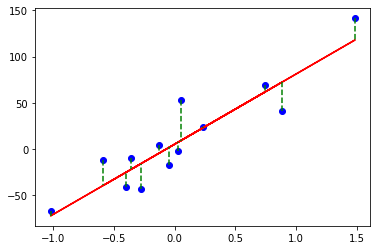

In [12]:
plt.plot(X_test, predictions, c='r')
plt.scatter(X_test, y_test, c='b')

for idx, x in enumerate(X_test[:,0]):
    plt.plot([x, x], [y_test[idx], predictions[idx]] ,c='g', linestyle='--')

### Gradient weights VS weights from normal equation

In [58]:
normal_eqn_weights = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

print(normal_eqn_weights)
print(weights)

[74.28755964]
[ 5.19445859 75.91707477]



## Extras
## Testing different learning rates

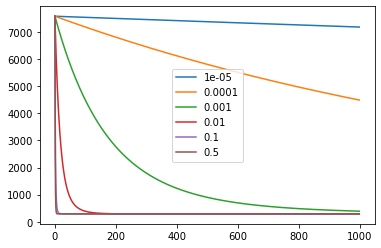

In [44]:
rates = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5]
losses = []

for rate in rates:
    loss_history = linear_regression(X_train, y_train, alpha=rate, n_iterations=1000)[1]
    losses.append(loss_history)
    
for idx,loss in enumerate(losses):
    plt.plot(loss, label=f'{rates[idx]}')
    
plt.legend()